In [1]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:

# Load data
data = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/Iteration4_40000samples_kohonen/atriumSimplifiedSDA+ASE+View_v4_40000samples.csv', delimiter= " ")
pd.set_option('display.max_columns', None)
#data.dropna(inplace=True)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  40000 non-null  float64
 1   typicalFacadeWindowWidth   40000 non-null  float64
 2   groundFacadeGlazingRatio   40000 non-null  float64
 3   groundFacadeWindowWidth    40000 non-null  float64
 4   buildingDepth              40000 non-null  float64
 5   balconyWidth               40000 non-null  float64
 6   atriumArea                 40000 non-null  float64
 7   aspectRatio                40000 non-null  float64
 8   groundFloorHeight          40000 non-null  float64
 9   typicalfloorHeight         40000 non-null  float64
 10  numberLevels               40000 non-null  float64
 11  groundSDA                  40000 non-null  float64
 12  firstSDA                   40000 non-null  float64
 13  groundASE                  40000 non-null  flo

In [ ]:
data.head()

,typicalFacadeGlazingRatio,typicalFacadeWindowWidth,groundFacadeGlazingRatio,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE,groundViewPercentage,firstViewPercentage
0,0.7,1.4,0.6,1.3,12.2,1.9,1147.2,0.3,1.8,1.7,1.6,23.0,18.9,6.0,4.8,34.8,34.9
1,0.8,1.2,0.8,1.5,12.7,1.7,1192.5,0.6,2.0,1.6,1.8,24.8,20.2,7.0,5.1,37.0,36.7
2,0.8,1.3,0.6,1.5,13.2,1.9,1249.0,0.6,1.8,1.6,1.7,25.9,21.0,7.0,5.1,38.3,38.3
3,0.5,1.6,0.8,1.4,13.8,1.9,1305.3,0.7,2.2,1.7,2.0,26.9,21.9,7.1,5.5,39.9,39.8
4,0.5,1.4,0.7,1.5,14.2,2.1,1380.8,0.4,2.2,1.7,1.9,28.1,23.0,7.7,5.6,42.0,42.2


In [ ]:
%matplotlib inline

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


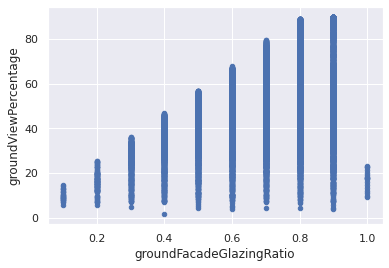

In [7]:
data.plot.scatter("groundFacadeGlazingRatio", "groundViewPercentage")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


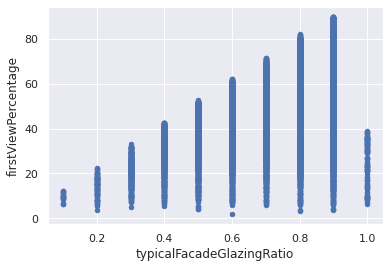

In [5]:
data.plot.scatter("typicalFacadeGlazingRatio", "firstViewPercentage")

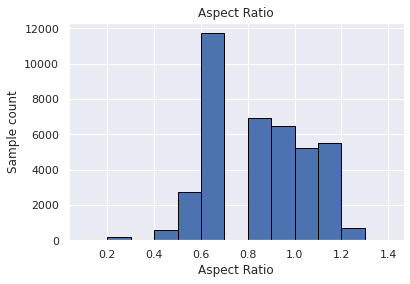

In [8]:
w=0.1
plt.hist(data.aspectRatio, edgecolor='black', bins=np.arange(min(data.aspectRatio), max(data.aspectRatio+w) + w, w)) 
plt.title('Aspect Ratio')
plt.xlabel('Aspect Ratio')
plt.ylabel('Sample count')
plt.show()

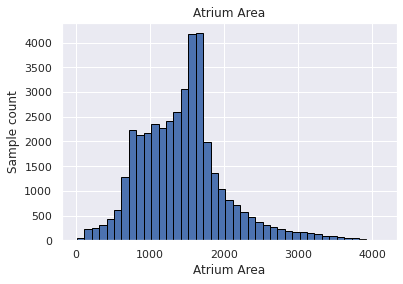

In [9]:
w=100
plt.hist(data.atriumArea, edgecolor='black', bins=np.arange(min(data.atriumArea), max(data.atriumArea+w) + w, w)) 
plt.title('Atrium Area')
plt.xlabel('Atrium Area')
plt.ylabel('Sample count')
plt.show()

In [ ]:

count = data.aspectRatio.unique().size
print("Unique values count : "+ str(count))

Unique values count : 11


In [ ]:
print(data.aspectRatio.value_counts())

0.5    697
0.6    253
1.0    247
0.7    246
0.9    246
0.8    228
1.3    204
1.2    179
1.1    173
0.4     24
0.3      3
Name: aspectRatio, dtype: int64


In [ ]:
data[data.aspectRatio == 1.4].count()

typicalFacadeGlazingRatio    0
typicalFacadeWindowWidth     0
groundFacadeGlazingRatio     0
groundFacadeWindowWidth      0
buildingDepth                0
balconyWidth                 0
atriumArea                   0
aspectRatio                  0
groundFloorHeight            0
typicalfloorHeight           0
numberLevels                 0
groundSDA                    0
firstSDA                     0
groundASE                    0
firstASE                     0
groundViewPercentage         0
firstViewPercentage          0
dtype: int64

(array([  82.,  256.,  328.,  436.,  769., 2064., 2447., 2427., 2504.,
        2227., 2183., 2285., 2580., 2994., 4245., 3570., 1597., 1118.,
         869.,  695.,  593.,  561.,  508.,  422.,  357.,  294.,  244.,
         214.,  192.,  168.,  166.,  137.,  115.,   99.,   77.,   67.,
          51.,   38.,   21.,    0.]),
 array([ 0.9,  1.9,  2.9,  3.9,  4.9,  5.9,  6.9,  7.9,  8.9,  9.9, 10.9,
        11.9, 12.9, 13.9, 14.9, 15.9, 16.9, 17.9, 18.9, 19.9, 20.9, 21.9,
        22.9, 23.9, 24.9, 25.9, 26.9, 27.9, 28.9, 29.9, 30.9, 31.9, 32.9,
        33.9, 34.9, 35.9, 36.9, 37.9, 38.9, 39.9, 40.9]),
 <a list of 40 Patch objects>)

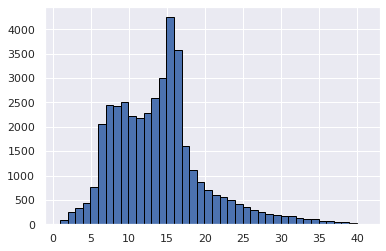

In [10]:
w=1
plt.hist(data.buildingDepth, edgecolor='black', bins=np.arange(min(data.buildingDepth), max(data.buildingDepth+w) + w, w)) 

In [ ]:
print(data.buildingDepth.value_counts())

15.0    150
14.9     96
27.8     90
28.7     85
27.9     84
       ... 
38.1      1
37.6      1
37.3      1
35.9      1
34.3      1
Name: buildingDepth, Length: 253, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18811d6fd0>]],
      dtype=object)

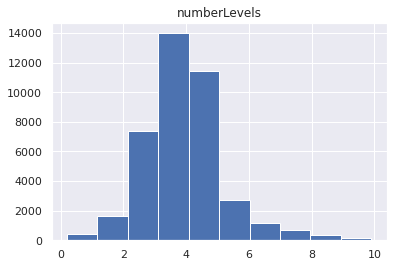

In [11]:
data.hist("numberLevels")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84ad18eed0>]],
      dtype=object)

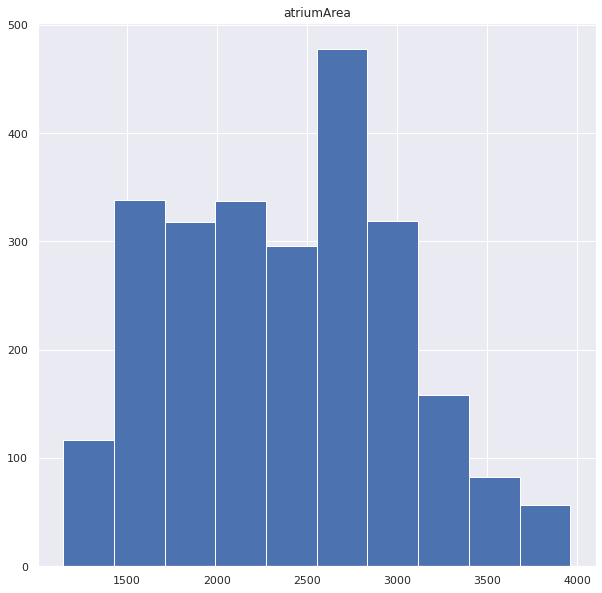

In [ ]:
data.hist("atriumArea")

In [ ]:
w=100
plt.hist(data.atriumArea, edgecolor='black', bins=np.arange(min(data.atriumArea), max(data.atriumArea+w) + w, w))

(array([3324., 6136.,  540.,    0.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5]),
 <a list of 4 Patch objects>)

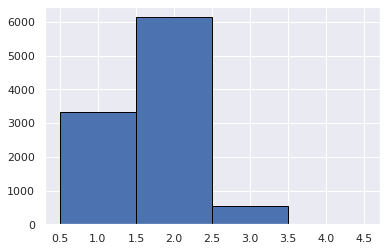

In [ ]:
w=1
plt.hist(data.balconyWidth, edgecolor='black', bins=np.arange(min(data.balconyWidth), max(data.balconyWidth+w) + w, w)) 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


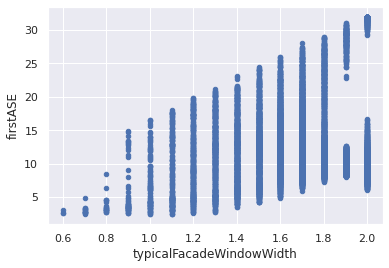

In [ ]:

data.plot.scatter("typicalFacadeWindowWidth", "firstASE")

In [ ]:
print(data.balconyWidth.value_counts())

6    353
1    342
3    342
2    330
4    328
5    305
Name: balconyWidth, dtype: int64


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


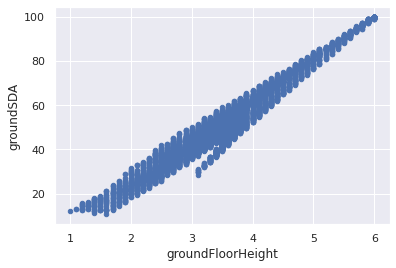

In [ ]:
data.plot.scatter("groundFloorHeight", "groundSDA")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


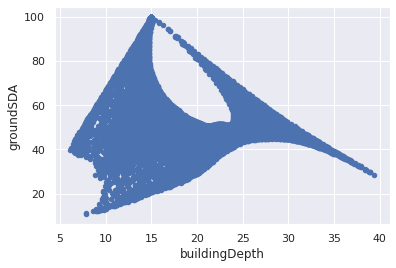

In [ ]:
data.plot.scatter("buildingDepth", "groundSDA")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


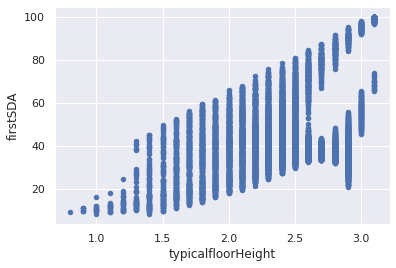

In [ ]:
data.plot.scatter("typicalfloorHeight", "firstSDA")

Predicting Hypotenuse from lenX and lenY

Prepare data

In [ ]:
# Select the (independant) features that we are going to use to train the model
X_lengths = data.loc[:, ["lenX", "lenY"]]
print(X_lengths)

KeyError: ignored

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_lengths_scaled = scalerX.fit_transform(X_lengths)

In [ ]:
# Define the dependant variable / target to predict 
y_reg = data.hypotenuse


In [ ]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_lengths_scaled, y_reg, data, test_size = 0.2, random_state = 42)

Train model

In [ ]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
SKmodel = LinearRegression()

from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(kernel = "polynomial", degree = 2)

# Model training
SKmodel.fit(X_train, y_train)

# Model performance on the test-set / This score is R^2
print(SKmodel.score(X_test, y_test))

0.9591510955626487


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, SKmodel.predict(X_test)))

25.018002716866548


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


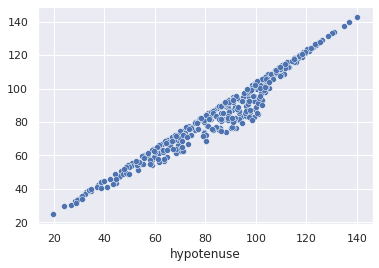

In [ ]:
# We can also inspect our results visually
y_pred = SKmodel.predict(X_test)

sns.scatterplot(y_test,y_pred)

TENSORFLOW

In [ ]:
# Instantiate a sequential model
TFmodel = tf.keras.models.Sequential() 

TFmodel.add(tf.keras.layers.Dense(4, input_shape=(2,), activation='relu'))
TFmodel.add(tf.keras.layers.Dense(2, activation='relu'))
  
# Add a dense layer with 1 value output
TFmodel.add(tf.keras.layers.Dense(1, activation= "linear"))
  
# Compile your model 
TFmodel.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
TFmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = TFmodel.fit(X_train,y_train,epochs=400, validation_split=0.2)

Epoch 1/400
40/40 [==============================] - 1s 4ms/step - loss: 7256.2017 - val_loss: 7329.6821
Epoch 2/400
40/40 [==============================] - 0s 2ms/step - loss: 7222.0615 - val_loss: 7289.8384
Epoch 3/400
40/40 [==============================] - 0s 2ms/step - loss: 7177.8975 - val_loss: 7238.7046
Epoch 4/400
40/40 [==============================] - 0s 2ms/step - loss: 7121.4795 - val_loss: 7172.9585
Epoch 5/400
40/40 [==============================] - 0s 3ms/step - loss: 7048.9033 - val_loss: 7090.3188
Epoch 6/400
40/40 [==============================] - 0s 2ms/step - loss: 6957.6045 - val_loss: 6984.3452
Epoch 7/400
40/40 [==============================] - 0s 2ms/step - loss: 6842.7549 - val_loss: 6853.7007
Epoch 8/400
40/40 [==============================] - 0s 2ms/step - loss: 6702.9790 - val_loss: 6694.3877
Epoch 9/400
40/40 [==============================] - 0s 2ms/step - loss: 6533.5864 - val_loss: 6508.0283
Epoch 10/400
40/40 [==============================] - 0

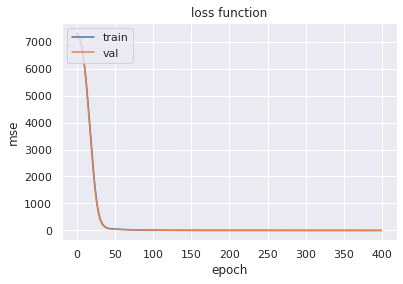

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate your model accuracy on the test data
loss_test = TFmodel.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.3162
mse_test: 0.31619974970817566


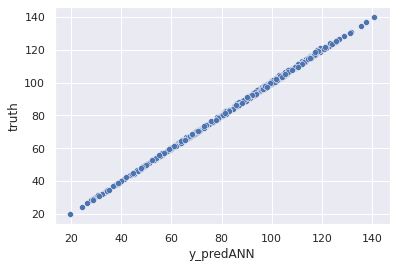

In [ ]:
# We can also inspect our results visually
y_pred = TFmodel.predict(X_test)

data_test["y_predANN"] = y_pred
data_test["truth"] = y_test
sns.scatterplot(x = "y_predANN", y = "truth", data = data_test)